In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from emnist import extract_training_samples
from emnist import list_datasets
from emnist import extract_test_samples
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import mnist
from keras.utils import np_utils as np
import tensorflowjs as tfjs
from keras.regularizers import L2

In [ ]:

(x_train, y_train) = extract_training_samples('byclass') 
(x_test, y_test) = extract_test_samples('byclass')


In [ ]:
tf.keras.regularizers.L2(l2=0.001)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32")
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32")
x_train /= 255
x_test /= 255
y_train = np.to_categorical(y_train)
y_test = np.to_categorical(y_test)

In [ ]:
rotation_range_val = 15
width_shift_val = 0.10
height_shift_val = 0.10

train_datagen = ImageDataGenerator(rotation_range = rotation_range_val,
                             width_shift_range = width_shift_val,
                             height_shift_range = height_shift_val)

train_datagen.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))

In [ ]:

classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation="relu"))

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Dropout(0.2))

classifier.add(Conv2D(32, (3, 3), activation="relu"))

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Dropout(0.2))


classifier.add(Flatten())


classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dense(units=62, activation="softmax"))

classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [ ]:

history = classifier.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=15)

scores = classifier.evaluate(x_test, y_test, verbose=0)
print("Error: {:.2f}%".format((1-scores[1])*100))

tfjs.converters.save_keras_model(classifier, "model")

Epoch 1/15
5453/5453 [==============================] - 202s 37ms/step - loss: 0.6095 - accuracy: 0.8014 - val_loss: 0.4330 - val_accuracy: 0.8429
Epoch 2/15
5453/5453 [==============================] - 209s 38ms/step - loss: 0.4382 - accuracy: 0.8444 - val_loss: 0.3997 - val_accuracy: 0.8525
Epoch 3/15
5453/5453 [==============================] - 200s 37ms/step - loss: 0.4107 - accuracy: 0.8514 - val_loss: 0.3808 - val_accuracy: 0.8604
Epoch 4/15
5453/5453 [==============================] - 199s 37ms/step - loss: 0.3972 - accuracy: 0.8550 - val_loss: 0.3729 - val_accuracy: 0.8622
Epoch 5/15
5453/5453 [==============================] - 196s 36ms/step - loss: 0.3873 - accuracy: 0.8579 - val_loss: 0.3759 - val_accuracy: 0.8613
Epoch 6/15
5453/5453 [==============================] - 194s 36ms/step - loss: 0.3812 - accuracy: 0.8595 - val_loss: 0.3624 - val_accuracy: 0.8654
Epoch 7/15
5453/5453 [==============================] - 211s 39ms/step - loss: 0.3758 - accuracy: 0.8614 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


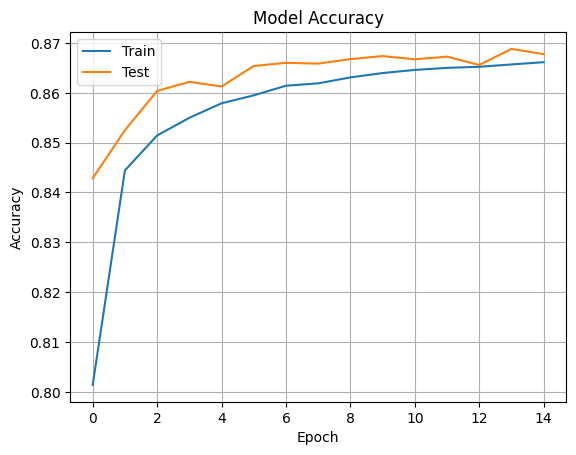

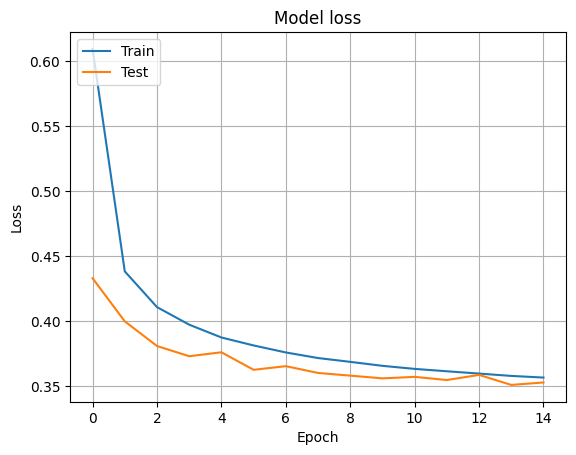

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()